# 📓 04 - Future Sales Forecasting

In this notebook, we use the trained XGBoost model to forecast future sales for a given store.  
This demonstrates the model's practical application and completes the prediction pipeline.


## 🧪 Load Libraries


In [1]:

import pandas as pd
import joblib
from datetime import timedelta
import sys
import os
#Add src to path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('/home/amanda/rossmann-sales-forecast/src/'), '..')))

from src.etl import carregar_dados, limpar_dados
from src.features import criar_variaveis_temporais, criar_lags, criar_medias_moveis
from src.predict import prever_proximos_dias


## 📦 Load Trained Model

We load the XGBoost model trained and saved in the previous notebook.


In [2]:
model_path = "/home/amanda/rossmann-sales-forecast/models/xgb_model.pkl"
model = joblib.load(model_path)


## 📂 Load and Prepare Data

We load the raw training and store data, then apply preprocessing.


In [3]:
data_train_path = "~/rossmann-sales-forecast/data/raw/train.csv"
data_store_path = "~/rossmann-sales-forecast/data/raw/store.csv"

df = carregar_dados(data_train_path, data_store_path)
df = limpar_dados(df)


/home/amanda/rossmann-sales-forecast/src/etl.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(caminho_treino)


## 📈 Forecast Future Sales

Now, we forecast future sales for a specific store using the


In [6]:
store_id = 3
n_dias = 14  # number of future days to predict

df_previsto = prever_proximos_dias(df, model, store_id=store_id, n_dias=n_dias)

# If no data is returned (e.g., closed store), print a warning
if isinstance(df_previsto, str):
    print(df_previsto)
else:
    df_previsto.head()


## 📊 Visualize Forecast vs. Historical Sales

We compare the predicted values with the most recent 30 days of actual sales for the selected store.


/tmp/ipykernel_11822/3507759097.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/amanda/miniforge3/envs/cvstars/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


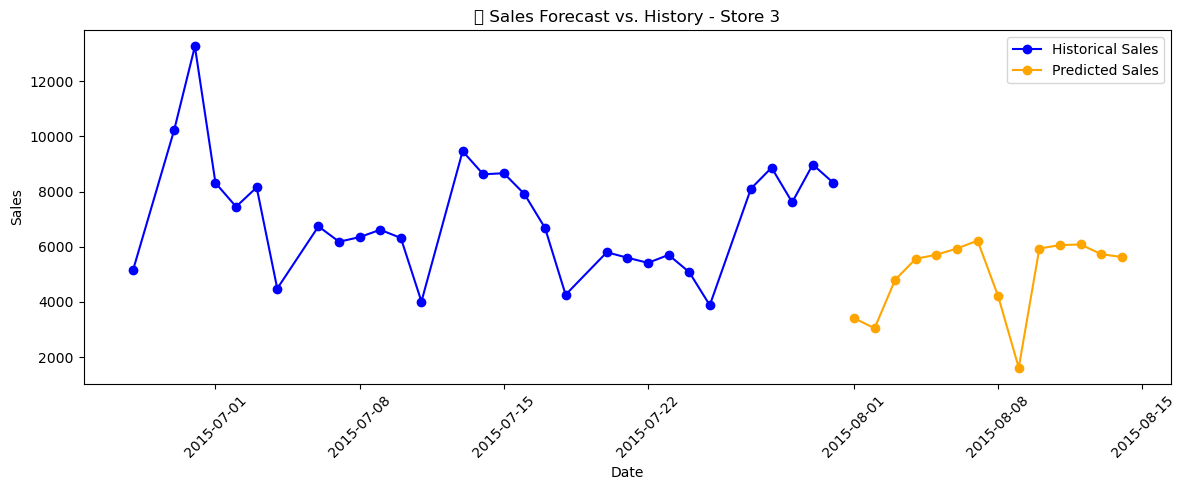

In [7]:
import matplotlib.pyplot as plt

historico = df[df['Store'] == store_id].sort_values('Date').copy()
historico = historico[historico['Sales'] > 0]
historico_recente = historico.tail(30)

plt.figure(figsize=(12, 5))
plt.plot(historico_recente['Date'], historico_recente['Sales'], label="Historical Sales", color="blue", marker='o')
plt.plot(df_previsto['Data_prevista'], df_previsto['Previsao_vendas'], label="Predicted Sales", color="orange", marker='o')
plt.title(f"📈 Sales Forecast vs. History - Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
